# **Camera Calibration**

This notebook explores using OpenCV to correct camera distortion and abberations.

## **Imports**

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
%matplotlib inline

## **Motivation**

Cameras naturally produce distortion and abberations meaning that the ouput video/image geometries do not accurately represent the real-world geometries. When working with computer vision, specifically with measurements, it is important to reduce the distortion within the data to accurately object geometries. We want to ensure that what we measure through the computer vision system is the same as what we measure in real life. 

There are numerous ways to calibrate cameras. Complex problems that require a high degree of precision need to ensure that the vision system is also calibrated to a high degree of precision. Contrarily, simple problem do not need a high degree of precision meaning that simpler calibrations methods are sufficient. In our case, our problem of lane detection does not require a high degree of precision so we are able to get away with simpler calibration methods.

The remainder of this notebook will explore how we can use `OpenCV` to calibrate a camera and remove distortion from our test images and video frames.

## **Images for Calibration**

The calibration images contain pictures of a sheet of paper with a chessboard on it taken from different angles and distances. It is important to try to capture different perspectives to ensure that the calibration can account for different situations. Here is a sample of the images that will be used for camera calibration:

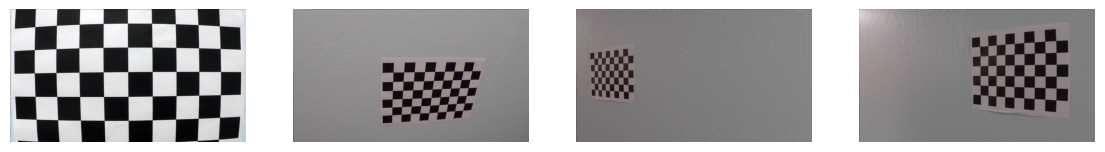

In [26]:
folder = 'camera_cal/'
images = []

# Load in all calibration images
for file in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)

# Plot first four images
_, axs = plt.subplots(1, 4, figsize = (14,12))
axs = axs.flatten()
for img, ax in zip(images[:4], axs):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
board_size = (9, 6)             # Number of inner corners (x,y)
objpoints = []                  # 3D points in actual space
imgpoints = []                  # 2D points in image plane

# Create an array of zeros, where each row represents the 3D
# coordinate of a single corner point.
obj = np.zeros((board_size[0] * board_size[1], 3))


for img in images:
